In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math

$$\begin{align}
V &= V_{max} \left(1 - \frac{\rho}{\rho_{max}} \right)\\
F = F(\rho) = V(\rho)\rho &= V_{max} \rho \left(1 - \frac{\rho}{\rho_{max}} \right) \\
\frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial \rho} \frac{\partial \rho}{\partial x} &= 0\\
\frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial x} &= 0\\
\frac{\partial \rho}{\partial t} + \frac{V_{max}\partial F}{\partial x} &= 0
\end{align}
$$


In [2]:
# Given data
V_max = 80      # Maximum velocity when rho is 0 [km/hr]
L = 11          # Length [km]
rho_max = 250   # Traffic density [cars/km]
nx = 51         # Dividing the Length
dt = 0.001      # Time step [hr]

### Simulation Part A

In [3]:
# Initial condition
x = np.linspace(0, L, nx)
rho0 = np.ones(nx)*10
rho0[10:20] = 50

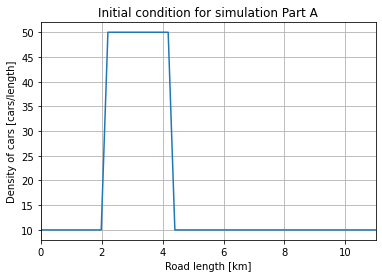

In [4]:
# Plotting initial condition
plt.plot(x, rho0)
plt.title('Initial condition for simulation Part A')
plt.xlabel('Road length [km]')
plt.ylabel('Density of cars [cars/length]')
plt.xlim(min(x), max(x))
plt.grid()
plt.show()

In [5]:
def V(rho):
    return V_max*(1 - (rho/ rho_max))

def F(rho):
    return rho*(1 - (rho/rho_max))

$$
\begin{equation}
u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)
\end{equation}
$$

$$
\begin{equation}
rho_i^{n+1} = rho^n - V_{max} \frac{\Delta t}{\Delta x}(F_i^n-F_{i-1}^n)
\end{equation}
$$

In [6]:
# CFL condition
dx = L/(nx - 1)
(V_max*dt)/dx <= 1   # Checking CFL condition

True

In [7]:
rho_un = rho0.copy()
rho_hist = [rho0.copy()]

time = 6.0                           # Time [min]
nt = int(math.ceil(time/(dt*60)))    # Number of time steps

# Calculating rho
for t in range(nt):
    F_cal = F(rho_un)
    rho_un[1:] = rho_un[1:] - V_max*(dt/dx)*(F_cal[1:] - F_cal[: -1])
    rho_hist.append(rho_un.copy())

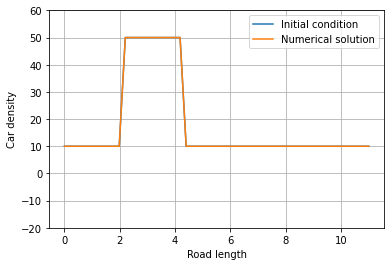

In [8]:
# Plotting
fig = plt.figure()
plt.plot(x, rho0, label = 'Initial condition')
line = plt.plot(x, rho_hist[0], label = 'Numerical solution')[0]
plt.xlabel('Road length')
plt.ylabel('Car density')
plt.ylim(-20, 60)
plt.grid()
plt.legend()
plt.show()

### Animation

In [9]:
from matplotlib import animation
from IPython.display import HTML

In [10]:
def graph_update(t, rho_hist):
    fig.suptitle('Time {}'.format(t))
    line.set_ydata(rho_hist[t])

    
anim = animation.FuncAnimation(fig, graph_update,
                               frames = nt, fargs = (rho_hist, ), interval = 100)
HTML(anim.to_html5_video())

### Velocity calculation

In [11]:
V = V_max*(1 - (np.array(rho_hist)/rho_max))

Enter the *minimum* velocity at time t = 0 in meters per second. Round to 2 decimal places

In [12]:
round(V[0].min()*(5/18), 2)

17.78

Enter the average velocity at time t = 3 minutes in meters per second. Round to 2 decimal places

In [13]:
round(V[int(3/(dt*60))].mean()*(5/18), 2)

20.64

Enter the *minimum* velocity at time t = 6 minutes in meters per second. Round to 2 decimal places

In [14]:
round(V[int(6/(dt*60))].min()*(5/18), 2)

18.78

### Simulation Part B

In [31]:
# Given data
V_max = 136      # Maximum velocity when rho is 0 [km/hr]
L = 11          # Length [km]
rho_max = 250   # Traffic density [cars/km]
nx = 51         # Dividing the Length
dt = 0.001      # Time step [hr]

In [32]:
# Initial condition
x = np.linspace(0, L, nx)
rho0 = np.ones(nx)*20
rho0[10:20] = 50

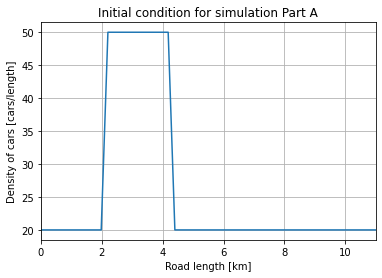

In [33]:
# Plotting initial condition
plt.plot(x, rho0)
plt.title('Initial condition for simulation Part A')
plt.xlabel('Road length [km]')
plt.ylabel('Density of cars [cars/length]')
plt.xlim(min(x), max(x))
plt.grid()
plt.show()

In [34]:
# CFL condition
dx = L/(nx - 1)
(V_max*dt)/dx <= 1   # Checking CFL condition

True

In [35]:
rho_un = rho0.copy()
rho_hist = [rho0.copy()]

time = 3.0                           # Time [min]
nt = int(math.ceil(time/(dt*60)))
nt = 50

for t in range(nt):
    F_cal = F(rho_un)
    rho_un[1:] = rho_un[1:] - V_max*(dt/dx)*(F_cal[1:] - F_cal[: -1])
    rho_hist.append(rho_un.copy())

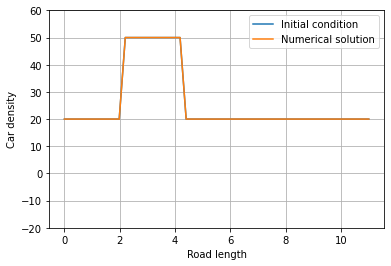

In [36]:
fig = plt.figure()
plt.plot(x, rho0, label = 'Initial condition')
line = plt.plot(x, rho_hist[0], label = 'Numerical solution')[0]
plt.xlabel('Road length')
plt.ylabel('Car density')
plt.ylim(-20, 60)
plt.grid()
plt.legend()
plt.show()

In [37]:
def graph_update(t, rho_hist):
    fig.suptitle('Time {}'.format(t))
    line.set_ydata(rho_hist[t])
    
anim = animation.FuncAnimation(fig, graph_update,
                               frames = nt, fargs = (rho_hist, ), interval = 100)
HTML(anim.to_html5_video())

In [38]:
V = V_max*(1 - (np.array(rho_hist)/rho_max))

Enter the *minimum* velocity at time t = 0 in meters per second. Round to 2 decimal places

In [39]:
round(V[0].min()*(5/18), 2)

30.22

Enter the average velocity at time t = 3 minutes in meters per second. Round to 2 decimal places

In [40]:
round(V[int(3/(dt*60))].mean()*(5/18), 2)

33.87

Enter the *minimum* velocity at time t = 3 minutes in meters per second. Round to 2 decimal places

In [41]:
round(V[-1].min()*(5/18), 2)

30.99